Porto Seguro's Safe Driver Prediction
====

## Introduction
[This competition](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data) is hosted by the third largest insurance company in Brazil: Porto Seguro with the task of predicting the probability that a driver will initiate an insurance claim in the next year.

In the train data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. **Values of -1 indicate that the feature was missing** from the observation. The target columns signifies whether or not a claim was filed for that policy holder

train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv file and take a look at it
train = pd.read_csv('train.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
# Taking a look at how many rows and columns the train dataset contains
rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {} rows and {} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


## 1. Data Quality Checks

### Null or missing values check
Let check whether there are any null values in the train dataset as follows:

In [4]:
train.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


**Note:** Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as *"Values of -1 indicate that the feature was missing from the observation"*. Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

In [5]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

We can use "Missingno" to visualize missing values in the dataset.

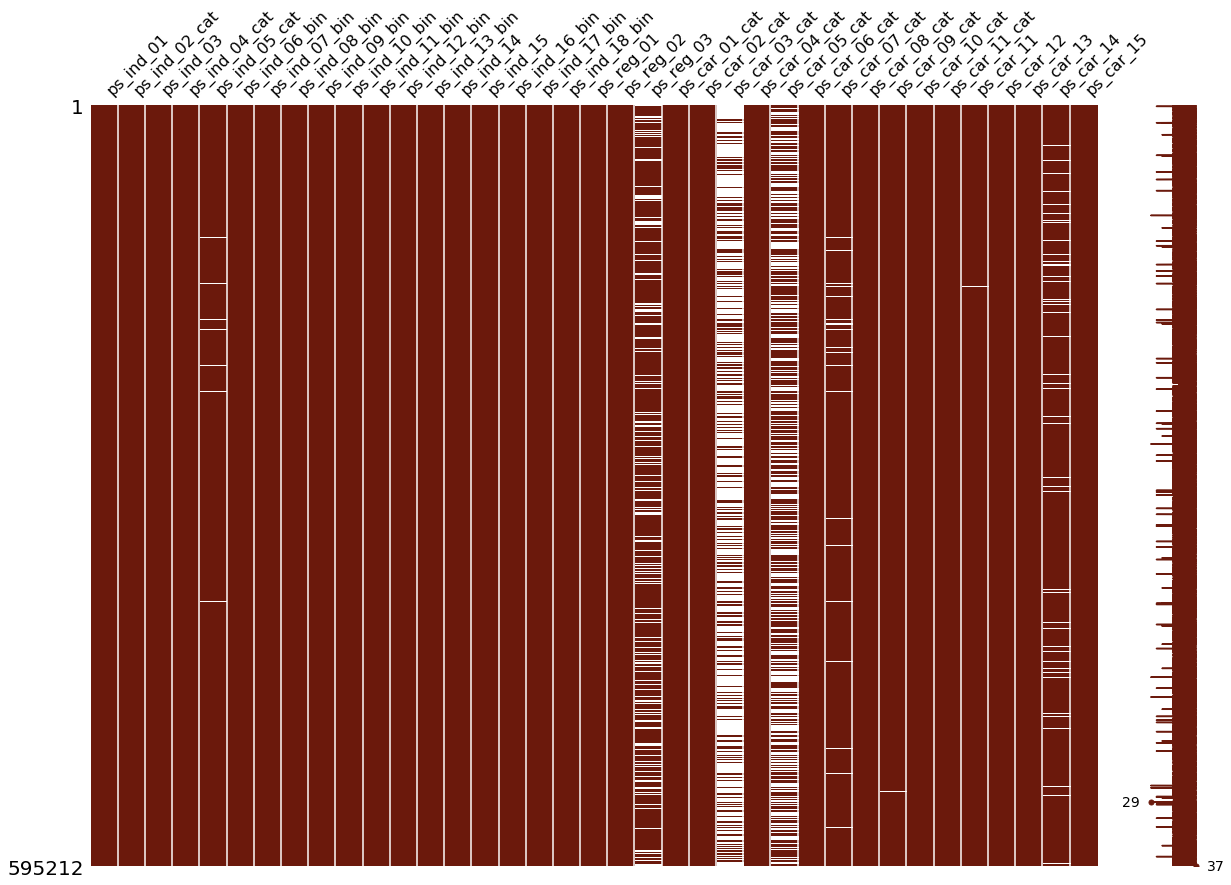

In [6]:
# If you don't have "Missingno" package, use this command to install
# (Linux) conda install -c conda-forge missingno
import missingno as msno

msno.matrix(df=train_copy.iloc[:, 2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [7]:
# List null columns name
# Hint: isnull()

for col in sorted(train.columns):
    num_null=train_copy[col].isnull().sum()
    if(num_null>0):
        print("%20s   %-20s" % (col, num_null))

       ps_car_01_cat   107                 
       ps_car_02_cat   5                   
       ps_car_03_cat   411231              
       ps_car_05_cat   266551              
       ps_car_07_cat   11489               
       ps_car_09_cat   569                 
           ps_car_11   5                   
           ps_car_12   1                   
           ps_car_14   42620               
       ps_ind_02_cat   216                 
       ps_ind_04_cat   83                  
       ps_ind_05_cat   5809                
           ps_reg_03   107772              


#### Target variable inspection

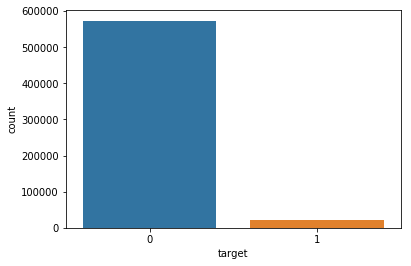

In [8]:
# Using countplot to represent target
sns.countplot(data=train, x='target')

## 2. Feature inspection and filtering

### Correlation plots
As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

#### Correlation of float features

In [9]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

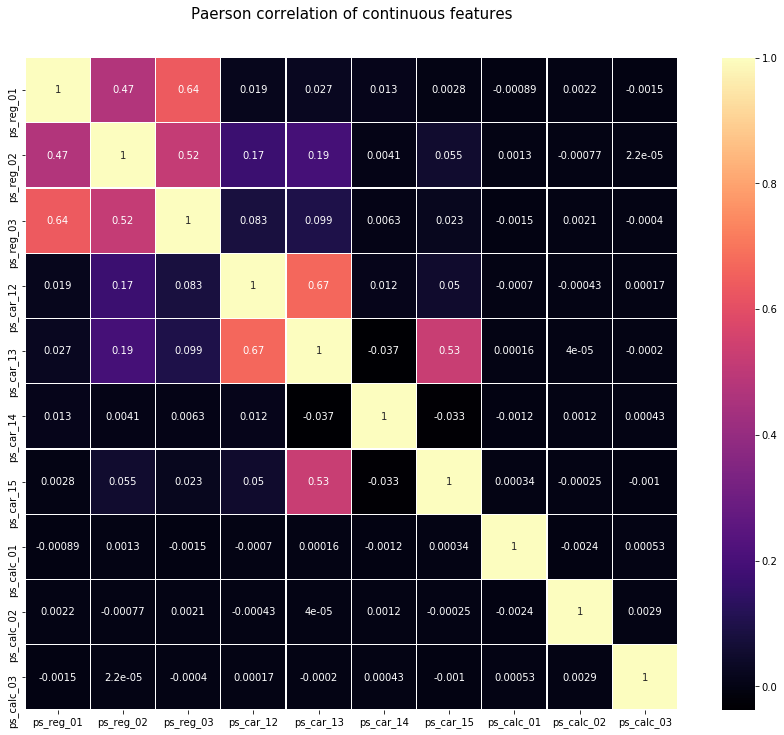

In [10]:
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_float.corr(), 
            linewidths=0.1, 
            vmax=1.0, 
            square=True,
            cmap=colormap,
            annot=True)
plt.show()

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the paired features that display a positive linear correlation are listed as follows:

(ps_reg_01, ps_reg_03)

(ps_reg_02, ps_reg_03)

(ps_car_12, ps_car_13)

(ps_car_13, ps_car_15)

### Correlation of integer features

In [11]:
train_int_corr=train_int.corr()

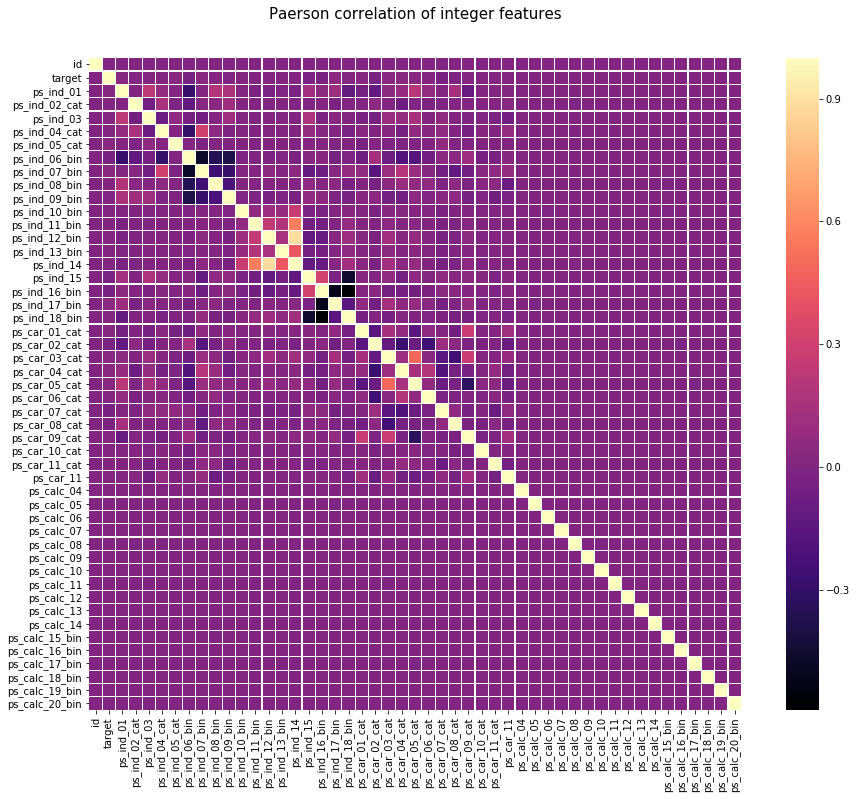

In [12]:
# Your code here
# Hint: correlation of train_int
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of integer features", y=1.05, size=15)
sns.heatmap(train_int_corr, 
            linewidths=0.1, 
            vmax=1.0, 
            square=True,
            cmap=colormap,
            annot=False)
plt.show()

#### Which features have negatively correlation?
Negatively correlated features : **Your answer here**

### Binary features inspection
Another aspect of the data that we may want to inspect would be the coulmns that only contain binary valeus, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly bar plot of these binary values as follows:

In [13]:
bin_col = list(filter(lambda x: '_bin' in x, train.columns))
bin_value_counts = train[bin_col].apply(pd.value_counts)

In [14]:
bin_value_counts

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,360852,442223,497644,484917,594990,594205,589594,594648,201882,523143,503879,522342,221514,265356,424278,387469,503955
1,234360,152989,97568,110295,222,1007,5618,564,393330,72069,91333,72870,373698,329856,170934,207743,91257


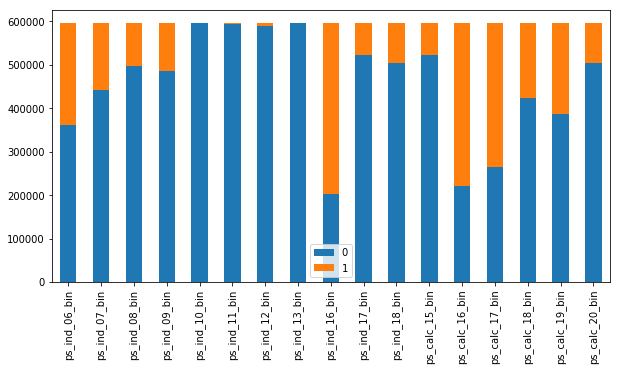

In [15]:
# hint pandas plot.bar with stacked=True

bin_value_counts.transpose().plot(kind='bar', 
                                  stacked=True,
                                  figsize=(10,5),
                                 legend=True)

Those columns ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. They do not contain much information.

## 3. Preprocess Data

In [16]:
# Import train_test_split 
from sklearn.model_selection import train_test_split

In [17]:
# Define X (features), y (target)
X = train.drop(columns=['target'])
y = train['target']

In [18]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Randomly Under-Sampling the Training Dataset¶
**Note:** Validate ratio between 2 class after Under-Sampling

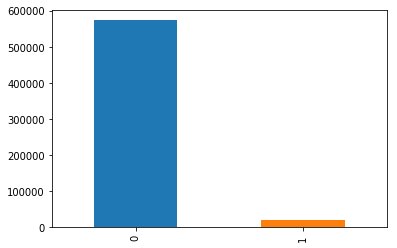

In [19]:
train['target'].value_counts().plot(kind='bar')

class_1=train[train['target']==1]
class_0=train[train['target']==0]
undersampled_0=class_0.sample(class_1.shape[0])

In [20]:
undersampled_train=pd.concat([class_1, undersampled_0], axis=0)

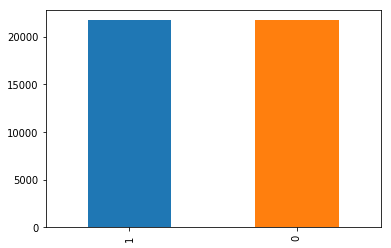

In [21]:
undersampled_train['target'].value_counts().plot(kind='bar')

#### Randomly Over-Sampling the Training Dataset
**Note:** Validate ratio between 2 class after Over-Sampling

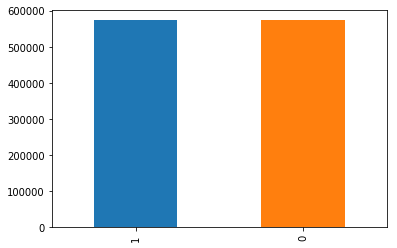

In [22]:
# Your code here
oversamppled_1=class_1.sample(class_0.shape[0], replace=True)
oversampled_train=pd.concat([class_0, oversamppled_1], axis=0)
oversampled_train['target'].value_counts().plot(kind='bar')

## 4. Modeling

In [23]:
# Spot check with LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, BernoulliNB, GaussianNB
# Import libraries and and create model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB

lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
bnb = BernoulliNB()
gnb = GaussianNB()

models = [lr, dtc, rfc, gnb, bnb]
models_name = ["Logistic Regression", "Decision Tree", "Random Forest", "Bernoulli NB", "Gaussian NB"]

## 5. Evaluation Metrics

In [24]:
# Import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report

# We create an utils function, that take a trained model as argument and print out confusion matrix
# classification report base on X and y
def evaluate_model(estimator, X, y):
    predict=estimator.predict(X)
    print('\nConfusion matrix:\n', confusion_matrix(y, predict))
    print('\nClassification report:\n', classification_report(y, predict))
    return 0

### Evaluate with Origin dataset

In [26]:
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Origin dataset
    model.fit(X_train, y_train)
    
    # Evaluate model with X_test, y_test
    evaluate_model(model, X_test, y_test)
    print("=======================================")

Model: Logistic Regression


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Confusion matrix:
 [[172050      0]
 [  6514      0]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172050
           1       0.00      0.00      0.00      6514

   micro avg       0.96      0.96      0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564

Model: Decision Tree


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Confusion matrix:
 [[163803   8247]
 [  6115    399]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    172050
           1       0.05      0.06      0.05      6514

   micro avg       0.92      0.92      0.92    178564
   macro avg       0.51      0.51      0.51    178564
weighted avg       0.93      0.92      0.92    178564

Model: Random Forest


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Confusion matrix:
 [[172039     11]
 [  6510      4]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172050
           1       0.27      0.00      0.00      6514

   micro avg       0.96      0.96      0.96    178564
   macro avg       0.62      0.50      0.49    178564
weighted avg       0.94      0.96      0.95    178564

Model: Bernoulli NB

Confusion matrix:
 [[172050      0]
 [  6514      0]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172050
           1       0.00      0.00      0.00      6514

   micro avg       0.96      0.96      0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564

Model: Gaussian NB


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Confusion matrix:
 [[171990     60]
 [  6503     11]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172050
           1       0.15      0.00      0.00      6514

   micro avg       0.96      0.96      0.96    178564
   macro avg       0.56      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



### Evaluate with *Undersampled* dataset

In [27]:
X_under=undersampled_train.drop(columns='target')
y_under=undersampled_train['target']

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3)

for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Origin dataset
    model.fit(X_train_under, y_train_under)
    
    # Evaluate model with X_test, y_test
    evaluate_model(model, X_test_under, y_test_under)
    print("=======================================")

Model: Logistic Regression


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Confusion matrix:
 [[3829 2681]
 [3138 3369]]

Classification report:
               precision    recall  f1-score   support

           0       0.55      0.59      0.57      6510
           1       0.56      0.52      0.54      6507

   micro avg       0.55      0.55      0.55     13017
   macro avg       0.55      0.55      0.55     13017
weighted avg       0.55      0.55      0.55     13017

Model: Decision Tree

Confusion matrix:
 [[3448 3062]
 [3041 3466]]

Classification report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53      6510
           1       0.53      0.53      0.53      6507

   micro avg       0.53      0.53      0.53     13017
   macro avg       0.53      0.53      0.53     13017
weighted avg       0.53      0.53      0.53     13017

Model: Random Forest

Confusion matrix:
 [[4226 2284]
 [3650 2857]]

Classification report:
               precision    recall  f1-score   support

           0       0.54      0.65

### Evaluate with *Oversampled* dataset

In [28]:
oversampled_train=oversampled_train.sample( int(oversampled_train.shape[0]/3) )

X_over=oversampled_train.drop(columns='target')
y_over=oversampled_train['target']

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.3)

for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Origin dataset
    model.fit(X_train_over, y_train_over)
    
    # Evaluate model with X_test, y_test
    evaluate_model(model, X_test_over, y_test_over)
    print("=======================================")

Model: Logistic Regression


/home/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Confusion matrix:
 [[36418 20959]
 [25860 31467]]

Classification report:
               precision    recall  f1-score   support

           0       0.58      0.63      0.61     57377
           1       0.60      0.55      0.57     57327

   micro avg       0.59      0.59      0.59    114704
   macro avg       0.59      0.59      0.59    114704
weighted avg       0.59      0.59      0.59    114704

Model: Decision Tree

Confusion matrix:
 [[49366  8011]
 [  103 57224]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92     57377
           1       0.88      1.00      0.93     57327

   micro avg       0.93      0.93      0.93    114704
   macro avg       0.94      0.93      0.93    114704
weighted avg       0.94      0.93      0.93    114704

Model: Random Forest

Confusion matrix:
 [[56706   671]
 [  295 57032]]

Classification report:
               precision    recall  f1-score   support

           0       0.

### Conclusion

Which model has lowest/highest accuracy?
Which model has lowest/highest recall?
Which model has lowest/highest f1?

## 6. GridsearchCV

In [33]:
divisor=10
y_under=y_under.sample( int(y_under.shape[0]/divisor))
X_under=X_under.sample( int(X_under.shape[0]/divisor))
y_under.shape, X_under.shape

((289,), (289, 58))

In [38]:
# Using gridsearchcv, random forest model and this param grid to find the best combination of parameters 
# Hint: example
# https://stackoverflow.com/questions/30102973/how-to-get-best-estimator-on-gridsearchcv-random-forest-classifier-scikit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

rfc = RandomForestClassifier(n_jobs=3, max_features= 'sqrt', n_estimators=50, oob_score = True) 

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

CV_rfc = GridSearchCV(estimator=rfc,
                      param_grid=param_grid, 
                      cv=5, 
                      verbose=4,
                      n_jobs=3)

CV_rfc.fit(X_train, y_train)

print('\n',CV_rfc.best_estimator_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    9.6s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   41.6s
[Parallel(n_jobs=3)]: Done 215 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done 386 tasks      | elapsed:  3.4min
[Parallel(n_jobs=3)]: Done 607 tasks      | elapsed:  5.2min
[Parallel(n_jobs=3)]: Done 876 tasks      | elapsed:  7.3min
[Parallel(n_jobs=3)]: Done 1195 tasks      | elapsed:  9.6min



 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=90, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=True, random_state=None, verbose=0, warm_start=False)


[Parallel(n_jobs=3)]: Done 1440 out of 1440 | elapsed: 11.5min finished
/home/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### which is the best combination of parameter

In [39]:
print('\n',CV_rfc.best_estimator_)


 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=90, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=True, random_state=None, verbose=0, warm_start=False)


# Done! Great Job.